# CRISP DM

# Bussines Understanding

Jamur beracun adalah jenis jamur yang mengandung senyawa atau zat toksik yang berbahaya bagi manusia. Konsumsi jamur beracun dapat menyebabkan keracunan serius hingga kematian. Karena risiko yang terkait dengan jamur beracun, bisnis yang terkait dengan identifikasi, penanganan, dan pencegahan jamur beracun dapat menjadi penting dalam menjaga kesehatan dan keselamatan masyarakat.
Dataset berisi informasi jamur, termasuk class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat. Informasi ini dapat digunakan untuk menganalisis hubungan antara bentuk jamur dan jamur beracun/tidak.

Dataset :( https://www.kaggle.com/code/yonatanrabinovich/mushroom-classification-project/input )

# DATA UNDERSTANDING

Dari pengumpulan data yang telah diambil mengenai Jamur yang di derita oleh pasien, terdapat 23 kolom yang berisi 23 kolom int64. Jika menggunakan algoritma decision tree, maka hanya kolom yang berisi float64 atau int64 saja yang bisa diolah. Karena ini menggunakan algoritma decision tree. Berikut atribut-atribut nya :

1.  class
2.  cap_shape
3.  cap_surface
4.  cap_color
5.  bruises
6.  odor
7.  gill_attachment
8.  gill_spacing
9.  gill_size
10. gill_color
11. stalk_shape
12. stalk_root
13. stalk_surface_above_ring
14. stalk_surface_below_ring
15. stalk_color_above_ring
16. stalk_color_below_ring
17. veil_type
18. veil_color 
19. ring_number
20. ring_type
21. spore_print_color
22. population
23. habitat


In [1]:
import pandas as pd
import numpy as np


# Load DATASET

In [2]:
df = pd.read_csv('mushrooms.csv')
df.sample()

,Unnamed: 0,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,Unnamed: 24
6540,6540,1,5,2,2,0,7,1,0,1,...,6,7,0,2,1,0,7,4,0,1


In [3]:
df.head(10)

,Unnamed: 0,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,Unnamed: 24
0,0,1,5,2,4,1,6,1,0,1,...,7,7,0,2,1,4,2,3,5,1
1,1,0,5,2,9,1,0,1,0,0,...,7,7,0,2,1,4,3,2,1,0
2,2,0,0,2,8,1,3,1,0,0,...,7,7,0,2,1,4,3,2,3,0
3,3,1,5,3,8,1,6,1,0,1,...,7,7,0,2,1,4,2,3,5,1
4,4,0,5,2,3,0,5,1,1,0,...,7,7,0,2,1,0,3,0,1,0
5,5,0,5,3,9,1,0,1,0,0,...,7,7,0,2,1,4,2,2,1,0
6,6,0,0,2,8,1,0,1,0,0,...,7,7,0,2,1,4,2,2,3,0
7,7,0,0,3,8,1,3,1,0,0,...,7,7,0,2,1,4,3,3,3,0
8,8,1,5,3,8,1,6,1,0,1,...,7,7,0,2,1,4,2,4,1,1
9,9,0,0,2,9,1,0,1,0,0,...,7,7,0,2,1,4,2,3,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Unnamed: 0                8124 non-null   int64
 1   class                     8124 non-null   int64
 2   cap_shape                 8124 non-null   int64
 3   cap_surface               8124 non-null   int64
 4   cap_color                 8124 non-null   int64
 5   bruises                   8124 non-null   int64
 6   odor                      8124 non-null   int64
 7   gill_attachment           8124 non-null   int64
 8   gill_spacing              8124 non-null   int64
 9   gill_size                 8124 non-null   int64
 10  gill_color                8124 non-null   int64
 11  stalk_shape               8124 non-null   int64
 12  stalk_root                8124 non-null   int64
 13  stalk_surface_above_ring  8124 non-null   int64
 14  stalk_surface_below_ring  8124 non-null 

In [5]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="int64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True) 

In [6]:
numerical

['Unnamed: 0',
 'class',
 'cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'odor',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_type',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat',
 'Unnamed: 24']

In [7]:
catgcols

[]

In [8]:
df.head()

,Unnamed: 0,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,Unnamed: 24
0,0,1,5,2,4,1,6,1,0,1,...,7,7,0,2,1,4,2,3,5,1
1,1,0,5,2,9,1,0,1,0,0,...,7,7,0,2,1,4,3,2,1,0
2,2,0,0,2,8,1,3,1,0,0,...,7,7,0,2,1,4,3,2,3,0
3,3,1,5,3,8,1,6,1,0,1,...,7,7,0,2,1,4,2,3,5,1
4,4,0,5,2,3,0,5,1,1,0,...,7,7,0,2,1,0,3,0,1,0


In [9]:
df.drop("Unnamed: 0",axis=1, inplace=True)
df.drop("Unnamed: 24",axis=1, inplace=True)


In [10]:
df.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [11]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

In [12]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

# Transformasi Dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap_shape                 8124 non-null   int64
 2   cap_surface               8124 non-null   int64
 3   cap_color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill_attachment           8124 non-null   int64
 7   gill_spacing              8124 non-null   int64
 8   gill_size                 8124 non-null   int64
 9   gill_color                8124 non-null   int64
 10  stalk_shape               8124 non-null   int64
 11  stalk_root                8124 non-null   int64
 12  stalk_surface_above_ring  8124 non-null   int64
 13  stalk_surface_below_ring  8124 non-null   int64
 14  stalk_color_above_ring    8124 non-null 

In [14]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in catgcols:
    df[col] =le.fit_transform(df[col])

In [16]:
df[''] = le.fit_transform(df['class'])

In [17]:
df.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,
0,1,5,2,4,1,6,1,0,1,4,...,7,7,0,2,1,4,2,3,5,1
1,0,5,2,9,1,0,1,0,0,4,...,7,7,0,2,1,4,3,2,1,0
2,0,0,2,8,1,3,1,0,0,5,...,7,7,0,2,1,4,3,2,3,0
3,1,5,3,8,1,6,1,0,1,5,...,7,7,0,2,1,4,2,3,5,1
4,0,5,2,3,0,5,1,1,0,4,...,7,7,0,2,1,0,3,0,1,0


In [18]:
df.to_csv('mushrooms.csv')

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Membuat model decision tree

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.956916448684413
akurasi data testing = 0.9581538461538461 

confusion matrix : 
[[802  50]
 [ 18 755]]

classification report : 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       852
           1       0.94      0.98      0.96       773

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



# Simulasi Model

In [21]:
input_data = (5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==1):
    print ('Beracun')
else:
    print ('Tidak Beracun')

[1]
Beracun


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Visualisasi pohon keputusan

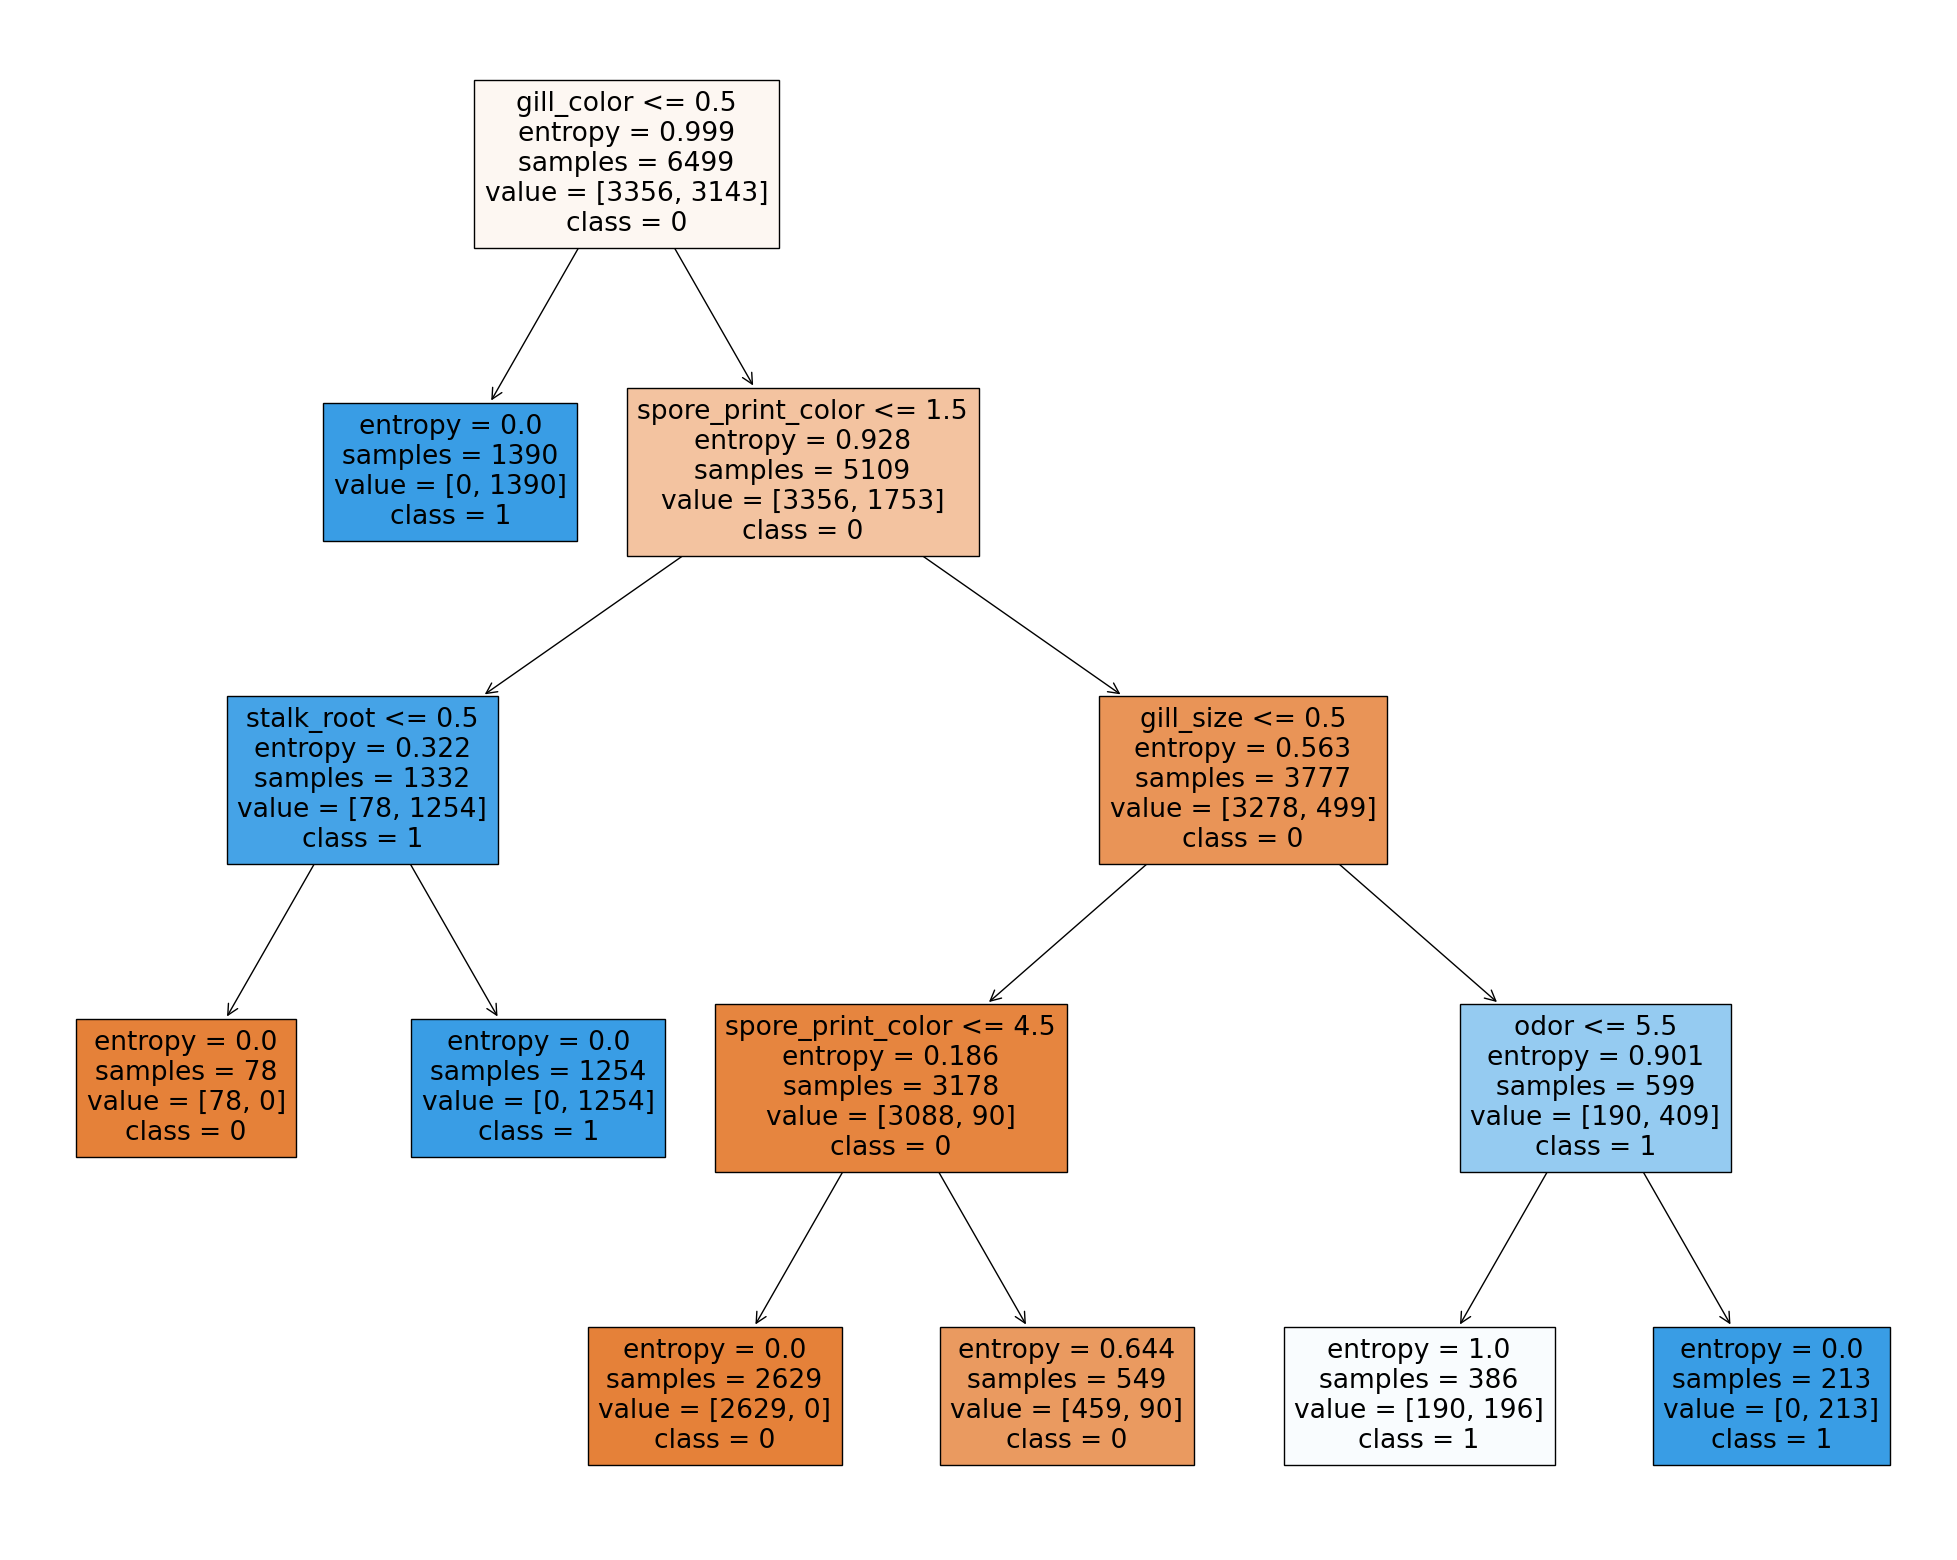

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['0','1'],
                   filled=True
                   )

# Save Model

In [23]:
import pickle

filename = 'mushrooms.sav'
pickle.dump(model, open(filename, 'wb'))